In [6]:
%matplotlib inline
import os
import pandas as pd
import torch
import torchvision
from d2l import torch as d2l


d2l.DATA_HUB['banana-detection'] = (
    d2l.DATA_URL + 'banana-detection.zip',
    '5de26c8fce5ccdea9f91267273464dc968d20d72')

In [12]:
#读取香蕉检测数据集中的图像和标签
def read_data_bananas(is_train=True):
    #下载香蕉数据集，并且将文件目录返回给data_dir
    data_dir=d2l.download_extract('banana-detection')
    #获取数据集和标签文件的文件名
    csv_fname=os.path.join(data_dir,'bananas_train' if is_train==True else 'bananas_val','label.csv')

    #将图片信息读取到csv_data中，并且将图片名这一列设置为行索引
    csv_data=pd.read_csv(csv_fname)
    csv_data=csv_data.set_index('img_name')

    images,targets=[],[]

    #对csv_data进行迭代读取
    for img_name,target in csv_data.iterrows():

        #将图片放入images中
        images.append(torchvision.io.read_image(
            os.path.join(data_dir,'bananas_train' if is_train==True else 'bananas_val','images',f'{img_name}')
        ))
        #target中包含（类别，左上x，左上y，右下x，右下y）
        targets.append(list(target))

    return images,torch.tensor(targets).unsqueeze(1)/256

In [13]:
#创建一个自定义的类来加载香蕉检测数据集

class BananasDataSet(torch.utils.data.Dataset):
    def __init__(self,is_train):
        self.features,self.labels=read_data_bananas(is_train)
        print('read'+str(len(self.features))+(f'traing examples' if is_train==True else f'validation examples'))

    def __getitem__(self,idx):
        return (self.features[idx].float(),self.labels[idx])
    
    def __len__(self):
        return len(self.features)


In [14]:
def load_data_bananas(batch_size):
    train_iter=torch.utils.data.DataLoader(BananasDataSet(is_train=True),batch_size,shuffle=True)
    val_iter=torch.utils.data.DataLoader(BananasDataSet(is_train=False),batch_size)

    return train_iter,val_iter

In [15]:
batch_size,edge_size=32,256
train_iter,_=load_data_bananas(batch_size)
batch=next(iter(train_iter))
batch[0].shape,batch[1].shape

read1000traing examples
read100validation examples


(torch.Size([32, 3, 256, 256]), torch.Size([32, 1, 5]))

AttributeError: module 'd2l.torch' has no attribute 'show_bboxes'

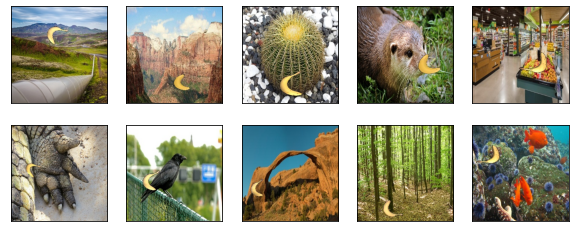

In [17]:
imgs=(batch[0][0:10].permute(0,2,3,1))/255
axes=d2l.show_images(imgs,2,5,scale=2)
for ax,label in zip(axes,batch[0:10]):
    d2l.show_bboxes(ax,[label[0][1:5]*edge_size],colors=['w'])